In [9]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as layers

import tensorflow.keras.datasets as datasets

## Data Define

In [24]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [25]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [26]:
np.min(train_x), np.max(train_x)

(0, 255)

In [28]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

In [29]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [30]:
train_x = train_x / 255.0

In [31]:
test_x = test_x / 255.0

In [32]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

## Model Define

In [17]:
inputs = layers.Input((28, 28, 1))

net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(inputs)
net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Flatten()(net)
net = layers.Dense(512, activation='relu')(net)
net = layers.Dropout(0.2)(net)
net = layers.Dense(10, activation='softmax')(net)

model = tf.keras.Model(inputs=inputs,
                      outputs=net,
                      name='Basic_CNN')

model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36

In [18]:
loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

In [19]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

In [40]:
num_classes = 10
batch_size = 32
epochs = 10

hist = model.fit(train_x, train_y, 
                 batch_size=batch_size,
                 shuffle=True,
                 epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0463 - accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0353 - accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0167 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0146 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0140 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [44]:
hist.history

{'loss': [0.04625581577420235,
  0.035297978669404984,
  0.028144769370555878,
  0.024528291076421738,
  0.019613629207015038,
  0.018200157210230827,
  0.01669524423778057,
  0.014586329460144043,
  0.013987001962959766,
  0.012274703942239285],
 'accuracy': [0.985966682434082,
  0.9891666769981384,
  0.9912833571434021,
  0.9925666451454163,
  0.9938333630561829,
  0.9940833449363708,
  0.9947500228881836,
  0.9955000281333923,
  0.9959666728973389,
  0.9962000250816345]}

range(0, 10)


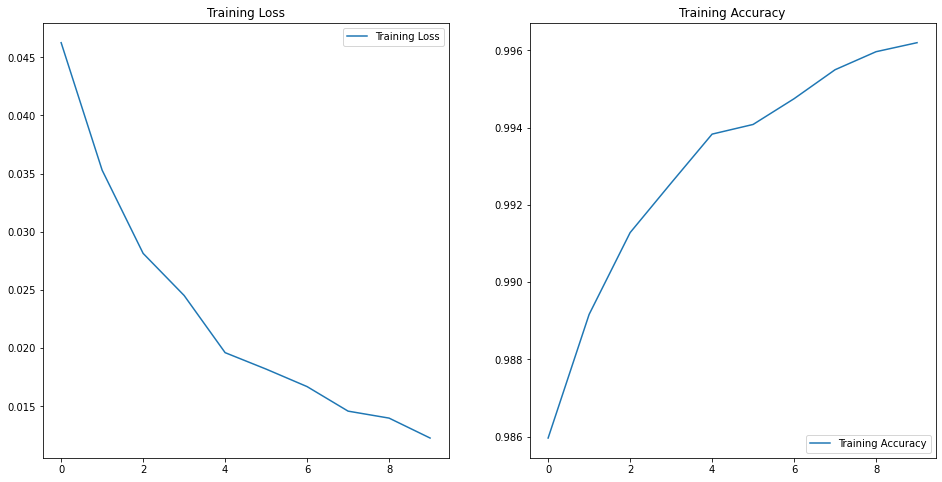

In [52]:
import matplotlib.pyplot as plt

loss=hist.history['loss']
accuracy = hist.history['accuracy']

epochs_range = range(len(loss))
print(epochs_range)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.show()

## Evaluate

In [53]:
model.evaluate(test_x, test_y, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0206 - accuracy: 0.9939


[0.020557792857289314, 0.9939000010490417]

In [54]:
test_image = test_x[0, :, :, 0]
test_image.shape

(28, 28)

In [57]:
test_image2 = test_image[tf.newaxis, ..., tf.newaxis]
test_image2.shape

(1, 28, 28, 1)

In [58]:
preds = model.predict(test_image2)

In [59]:
preds

array([[5.0323260e-16, 3.2981471e-12, 1.7681073e-12, 8.3180303e-11,
        2.7374683e-09, 3.1270527e-15, 1.6059320e-17, 1.0000000e+00,
        1.8678141e-12, 1.2832336e-09]], dtype=float32)

In [60]:
np.argmax(preds)

7

In [61]:
test_batch = test_x[:32]
test_batch.shape

(32, 28, 28, 1)

In [62]:
preds_batch = model.predict(test_batch)

In [63]:
preds_batch

array([[5.03230691e-16, 3.29814084e-12, 1.76810725e-12, 8.31801503e-11,
        2.73746315e-09, 3.12704087e-15, 1.60593195e-17, 1.00000000e+00,
        1.86780712e-12, 1.28322619e-09],
       [1.67775958e-16, 2.51172797e-15, 1.00000000e+00, 1.07490284e-17,
        2.23289910e-19, 1.05144588e-24, 4.89398928e-17, 2.69866897e-17,
        4.80480862e-17, 9.28444887e-21],
       [2.06849364e-08, 9.99972343e-01, 1.86040381e-07, 5.00083086e-09,
        1.78614505e-06, 4.60227193e-06, 4.43222962e-06, 1.03094117e-05,
        6.04634215e-06, 2.52778790e-07],
       [1.00000000e+00, 3.81223187e-15, 5.71015804e-11, 1.13105194e-11,
        8.70227718e-13, 7.27796642e-12, 4.17473984e-08, 8.35870956e-12,
        9.02498631e-11, 3.75383280e-10],
       [6.82629564e-10, 1.35129916e-08, 8.34714575e-10, 6.91036811e-11,
        9.99991775e-01, 3.54907659e-10, 9.29433419e-09, 2.92936497e-09,
        2.69537193e-08, 8.19614161e-06],
       [5.05965714e-10, 9.99994516e-01, 3.76035691e-09, 8.23624589e-13,
   

In [68]:
np.argmax(preds_batch, -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])